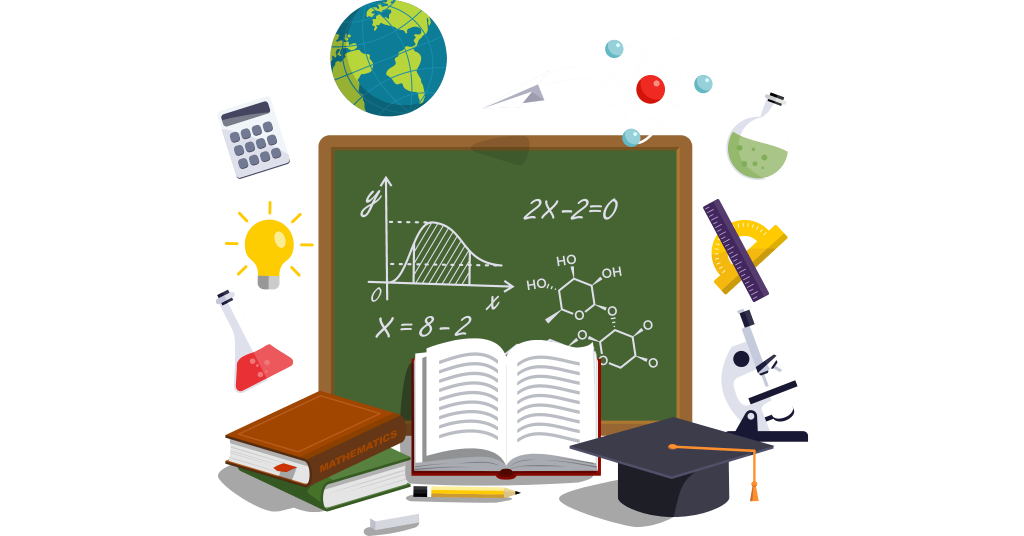

In [3]:
from IPython import display
display.Image("./3-Strategies-to-approach-data-representation-passages-ACT-science-1024x526-min-1024x536.png")

# 📕 **Overview**
Education plays a vital role in shaping the future of our society, and it is crucial to evaluate the effectiveness of various factors that contribute to student success. In this research report, by leveraging data manipulation and visualization techniques, we will undertake an analysis of a large school's year-end exam score results in the subjects of math, reading, and writing. Namely, we will assist the school's administration in making data-driven decisions regarding the efficacy of test preparation courses, as well as exploring the relationship bwetween parental education and student performance. 

The research objectives are thus the following:
1. To determine the average reading scores for students who've taken the test preparation course compared to those who haven't.
2. To assess the average scores across different parental education levels, in order to identify any notable trends or disparities.
3. To examine within-subgroup effects, by comparing the average scores of students with and without test preparation courses for different parental education levels.
4. To explore the correlations between scores in math, reading, and writing, in addition to investigating whether high exam performance in one subject translates to a high performance in others.

The [dataset](https://app.datacamp.com/workspace/w/2528f3a9-1114-4c92-a2ef-ecc7cb0fc98c#-the-data) used for this analysis contains the following fields:

- "**gender**" - male / female
- "**race/ethnicity**" - one of 5 combinations of race/ethnicity
- "**parent_education_level**" - highest education level of either parent
- "**lunch**" - whether the student receives free/reduced or standard lunch
- "**test_prep_course**" - whether the student took the test preparation course
- "**math**" - exam score in math
- "**reading**" - exam score in reading
- "**writing**" - exam score in writing

The report is structured into three distinct sections: an exploratory data analysis section, a main analysis section, and a final section for conclusions and recommendations.

# 📗 **Exploratory Data Analysis**

The purpose of this section is to gain familiarity with the dataset and acquire a preliminary understanding of its characteristics. Below we can see the first five rows of the dataset, with the headers adapted for greater readability:

In [1]:
# Importing packages
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from scipy.stats import iqr
plt.style.use("bmh")

In [2]:
# Reading in the data into a descriptive variable
exam_data = pd.read_csv('data/exams.csv')

#Changing "none" in test_prep_course to "not completed"
exam_data['test_prep_course'] = exam_data['test_prep_course'].map({"none":"not completed",
                                                                  "completed":"completed"})
#Renaming the headers:
exam_data = exam_data.rename(columns={"test_prep_course": "Test Preparation Course", 
                          "parent_education_level": "Parent Education Level",
                          "race/ethnicity":"Race/Ethnicity",
                          "gender":"Gender",
                          "math": "Math Exam Score",
                          "reading":"Reading Exam Score",
                          "writing":"Writing Exam Score",
                          "lunch": "Lunch"
                        })
# Take a look at the first five rows
exam_data.head(5)

,Gender,Race/Ethnicity,Parent Education Level,Lunch,Test Preparation Course,Math Exam Score,Reading Exam Score,Writing Exam Score
0,female,group B,bachelor's degree,standard,not completed,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,not completed,90,95,93
3,male,group A,associate's degree,free/reduced,not completed,47,57,44
4,male,group C,some college,standard,not completed,76,78,75


Now we can explore the dataset's variables, in order to identify any missing or erroneous data. From the table below, it is possible to see that the dataset doesn't contain any missing values and the data types are assigned correctly. There are 1000 entries, divided into eight columns: five categorical variables (gender, race/ethnicity, parent_education_level, lunch, and test_prep_course) and three numerical variables (math, reading, and writing).

In [3]:
#Checking the length and data type of each column, as well as whether or not there are any missing values.
exam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   1000 non-null   object
 1   Race/Ethnicity           1000 non-null   object
 2   Parent Education Level   1000 non-null   object
 3   Lunch                    1000 non-null   object
 4   Test Preparation Course  1000 non-null   object
 5   Math Exam Score          1000 non-null   int64 
 6   Reading Exam Score       1000 non-null   int64 
 7   Writing Exam Score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Analysis of Categorical Variables

Analyzing categorical variables in an EDA is crucial for understanding the composition and distribution of different groups or categories within the dataset. This can be achieved using descriptive statistics:

In [4]:
exam_data.describe(exclude = [np.number])

,Gender,Race/Ethnicity,Parent Education Level,Lunch,Test Preparation Course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,not completed
freq,518,319,226,645,642


At a first glance, gender, lunch, and test preparation course are variables with only two unique categories: these do not need to be visualized in a countplot in order to be analyzed. 
From the table we can conclude that the school's student population is well-balanced in terms of gender —the percentage of males is only 4 p.p higher than that of females— most students receive the standard lunch (approx. 65%), and a large proportion (64%) hasn't completed the test preparation course before the year-end examinations.

For the variables race/ethnicity and parent education level, we can tell that "group C" and "some college" are the most recurring categories, respectively. By visualizing them, however, we can see the frequency distribution of the other categories.

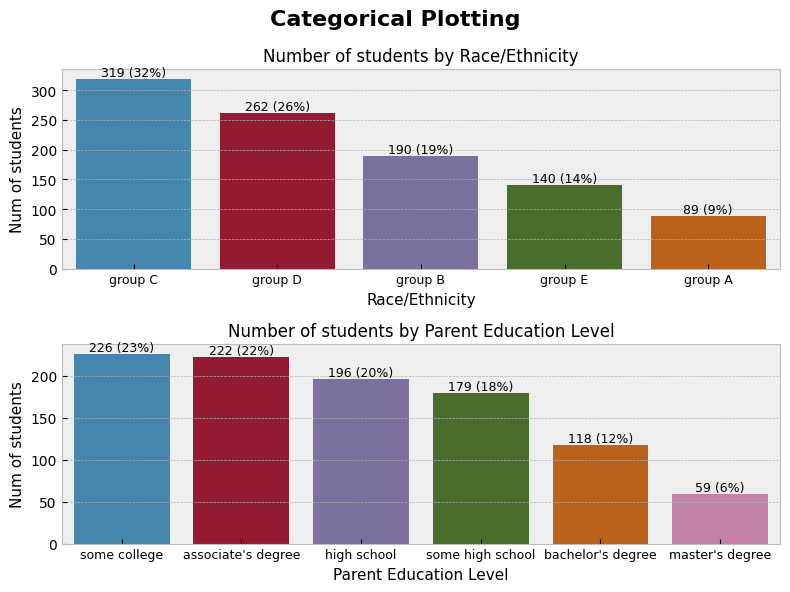

In [5]:
cat_vars= exam_data.select_dtypes(exclude=[np.number])
cat_cols = cat_vars[["Race/Ethnicity","Parent Education Level"]]
fig = plt.figure(figsize = (8,6))
a = 2
b = 1
c = 1
fig.suptitle('Categorical Plotting', fontsize = 16, fontweight = "bold")

for col in cat_cols:
    plt.subplot(a, b, c)
    plt.title(f'Number of students by {col}',fontsize = 12)
    plt.xlabel(col)
    l = sns.countplot(x = cat_cols[col],order=cat_cols[col].value_counts(ascending=False).index)
    abs_values = cat_vars[col].value_counts(ascending=False).values
    rel_values = cat_vars[col].value_counts(ascending=False, normalize=True).values * 100
    labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    l.bar_label(container=l.containers[0], labels=labels, fontsize = 9)
    plt.xlabel(col, fontsize = 11)
    plt.ylabel("Number of students",fontsize = 11)
    plt.xticks(fontsize=9)
    plt.ylabel("Num of students")
    c += 1

plt.tight_layout()
plt.show()

We can make a number of observations using the countplots. A good 44% of students have parents who've either started college and haven't finished it, or have an associate's degree. There's an almost equally large percentage of students whose parents haven't finished high school, or have at least received their diploma (32%). Only 18% of students have parents who are highly educated, having achieved a bachelor's or a master's degree. In terms of race/ethnicity, a third of the students are part of group C.

## Analysis of Numerical Variables

By analyzing the numerical variables we can obtain some quantitative insights about the exams dataset. Namely, via the use of measures of central tendency and dispersion, we can get an idea of the distribution and main characteristics of the data. It also helps us also uncover the existence of any outliers, which may significantly impact the analysis and interpretation of the results. The summary statistics table provides us with valuable information regarding how students performed in the year-end math, reading, and writing exams: 

In [6]:
#Summary statistics of the numeric variables
numeric_vars = exam_data.select_dtypes("int")
numeric_vars.describe().round()

,Math Exam Score,Reading Exam Score,Writing Exam Score
count,1000.0,1000.0,1000.0
mean,66.0,69.0,68.0
std,15.0,15.0,15.0
min,0.0,17.0,10.0
25%,57.0,59.0,58.0
50%,66.0,70.0,69.0
75%,77.0,79.0,79.0
max,100.0,100.0,100.0


The distributions of exam scores for reading, writing, and math present some similarities but aren't identical: math has the lowest mean exam score (66), reading the highest (69), and writing is in between (68). This suggests that, on average, students performed slightly better in reading compared to the other two subjects. This disparity, however, doesn't apply to the variability in exam performance across subjects: all test scores tend to fluctuate by around 15 points, regardless of whether they relate to reading, writing, or math. Finally, examining the percentiles, these are also relatively close across the board: 25% of participants achieved an exam score of 58 and below, while 75% of 78 and below. 

In light of these observations, it is important to consider these consistencies when interpreting individual student performance. Firstly, because it ensures a fair and balanced evaluation of students' inter-subject exam results, facilitating a comprehensive view of students' overall capabilities rather than attributing differences to efforts or abilities related to a specific subject. Secondly, it enables the school administration to identify those students who may require targeted support or interventions. 

For example, if a student always performs poorly in all subjects, rather than supporting them in resolving only subject-specific challenges, they may be in need of tutoring or additional instructional support to help bridge gaps in foundational knowledge. On the contrary, students who excel should be provided with enrichment programs to challenge and extend their learning, fostering continued academic progress and engagement. Both of these cases, at opposite ends of the spectrum, can be identified in the outlier analysis that will follow.

## Outlier Analysis

Considering the overall average grade as a benchmark, although it is evident that there is substantial room for improvement in the year-end exam performance of most students at this school, in this outlier analysis we will identify any students whose scores deviate significantly, both positively and negatively. We can already see, from the boxplots below, that there are students who are outliers, with exam scores that are well below a "fail" grade, potentially for more than one subject.

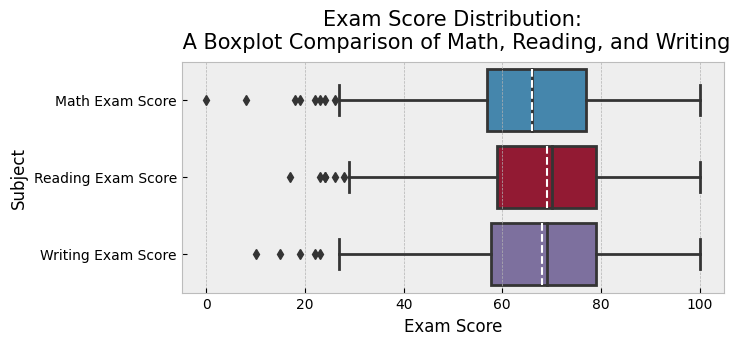

In [7]:
#Plotting a histogram for the three numeric variables to visualize the summary stats.
fig = plt.figure(figsize = (7,3))
sns.boxplot(numeric_vars, orient = "h", showmeans = True, meanline = True,meanprops = dict(color = "white", linewidth = 1.5))
plt.ylabel("Subject")
plt.xlabel("Exam Score")
plt.title("Exam Score Distribution:\n A Boxplot Comparison of Math, Reading, and Writing", fontsize = 15, y =1.02)
plt.show()

In [8]:
#IQR math
iqr_math = iqr(exam_data["Math Exam Score"])
#Thresholds math
lt_math= np.quantile(exam_data["Math Exam Score"], 0.25) - 1.5 * iqr_math
ut_math= np.quantile(exam_data["Math Exam Score"], 0.75) + 1.5 * iqr_math
#IQR writing
iqr_writing = iqr(exam_data["Writing Exam Score"])
lt_writing= np.quantile(exam_data["Writing Exam Score"], 0.25) - 1.5 * iqr_writing
ut_writing= np.quantile(exam_data["Writing Exam Score"], 0.75) + 1.5 * iqr_writing
#IQR reading
iqr_reading = iqr(exam_data["Reading Exam Score"])
lt_reading= np.quantile(exam_data["Reading Exam Score"], 0.25) - 1.5 * iqr_reading
ut_reading= np.quantile(exam_data["Reading Exam Score"], 0.75) + 1.5 * iqr_reading
#Finding the outliers
outliers = exam_data[(exam_data["Math Exam Score"] < lt_math) | (exam_data["Math Exam Score"] > ut_math) | 
         (exam_data["Writing Exam Score"] < lt_writing) | (exam_data["Writing Exam Score"] > ut_writing) | 
         (exam_data["Reading Exam Score"] < lt_reading) | (exam_data["Reading Exam Score"] > ut_reading) ]

Using the IQR, we can identify thesm. They are 12 in total, with certain characteristics that serve as a fil rouge between them: most are female, receive a free/reduced lunch, and haven't completed the test preparation course. These students will not be eliminated from the dataset as they are most likely not a product of erroneous data imputation. They are most likely students who are clearly struggling: additional analysis is recommended in order to determine the cause of such a poor exam performance and provide academic guidance, so that they are not penalised in the following exam cycle.

In [9]:
outliers.describe(exclude = [np.number])

,Gender,Race/Ethnicity,Parent Education Level,Lunch,Test Preparation Course
count,12,12,12,12,12
unique,2,5,4,2,2
top,female,group B,some high school,free/reduced,not completed
freq,8,6,4,10,11


## Conclusions
These results give us an initial idea of what lies beyond the data: it can be assumed — but this would require confirmation — that the school is located in a lower-middle class area, with residents belonging primarily to a certain race/ethnicity. This can be deduced by the significant percentage of students who receive a free/reduced lunch (35%), have parents who either haven't pursued higher education, or if they have, have done so likely at a community college (83%), and the predominance of a race/ethnicity in the dataset (group C). 

# 📘 **Main Analysis**

In this section we will focus on completing the research questions posed by the school administration. Namely, the average reading scores for students with and without test preparation courses will be determined, as well as the average scores across different parental education levels.

## Comparative Analysis of Average Reading Scores for Students with and without Test Preparation Courses

Out of the school population, 358 students have completed the test preparation course and 642 haven't, as previously outlined in the EDA. On average, students who've completed the test preparation course have a higher reading exam score compared to those who haven't, with the same variability (std = 14 points).

In [10]:
"""I used group by to group the exam data by those who have completed/haven't completed the test preparation course , aggregating the exam reading scores by mean and counting the number of students who have or haven't completed the course."""
mean_reading_scores_course = exam_data.groupby("Test Preparation Course").agg({"Reading Exam Score":[("Average Reading Exam Score","mean"), ("Variability in Reading Exam Scores", "std")], "Test Preparation Course":[("Number of Students","count")]})

#Dropping the redundant column header generated.
mean_reading_scores_course.columns = mean_reading_scores_course.columns.droplevel()
#Resetting the index so that I can rename the test_prep_course column as well.
mean_reading_scores_course.reset_index(inplace=True)
mean_reading_scores_course["Average Reading Exam Score"] = round(mean_reading_scores_course["Average Reading Exam Score"])

mean_reading_scores_course["Variability in Reading Exam Scores"] = round(mean_reading_scores_course["Variability in Reading Exam Scores"])

mean_reading_scores_course.rename(columns = {'test_prep_course':'Test Preparation Course'}, inplace=True)

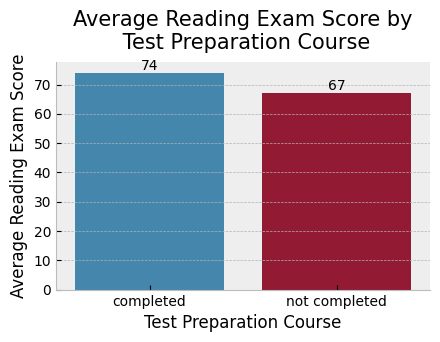

In [11]:
values = np.array(mean_reading_scores_course["Average Reading Exam Score"])
fig = sns.catplot(x = "Test Preparation Course", y= "Average Reading Exam Score", data = mean_reading_scores_course, kind = "bar",aspect=1.5, height = 3)
ax = fig.facet_axis(0, 0)
ax.bar_label(ax.containers[0])
plt.title("Average Reading Exam Score by\n Test Preparation Course",fontsize = 15, y =1.02)
plt.show()

## Exam Performance Variation Across Different Parent Education Levels

When it comes to math exam scores, on average students whose parents have some high school perform the poorest (63), while those whose parents have a master's degree the best (70). The highest performers for reading (75) and writing (76) also have parents with a master's degree, while the worst performers (65 for reading and 62 for writing) only a high school diploma.

In [12]:
""" I once again use group by to group the different exam scores by parental education level."""
scores_parental_edu = exam_data.groupby("Parent Education Level").agg({"Math Exam Score":[("Average Math Exam Score","mean")], "Reading Exam Score":[("Average Reading Exam Score","mean")], "Writing Exam Score":[("Average Writing Exam Score","mean")]})

scores_parental_edu.columns = scores_parental_edu.columns.droplevel()
scores_parental_edu.reset_index(inplace=True)
#Rounding the values in the exam score columns to the whole number.
scores_parental_edu["Average Math Exam Score"] = round(scores_parental_edu["Average Math Exam Score"])
scores_parental_edu["Average Reading Exam Score"] = round(scores_parental_edu["Average Reading Exam Score"])
scores_parental_edu["Average Writing Exam Score"] = round(scores_parental_edu["Average Writing Exam Score"])
#Creating a new column called "Average Exam Score" to see the average for each parent educaiton level.
scores_parental_edu["Average Exam Score"] = round((scores_parental_edu["Average Math Exam Score"] + 
                                              scores_parental_edu["Average Reading Exam Score"] + 
                                              scores_parental_edu["Average Writing Exam Score"])/3)
scores_parental_edu[["Parent Education Level", "Average Math Exam Score","Average Reading Exam Score", "Average Writing Exam Score"]].head(10)

,Parent Education Level,Average Math Exam Score,Average Reading Exam Score,Average Writing Exam Score
0,associate's degree,68.0,71.0,70.0
1,bachelor's degree,69.0,73.0,73.0
2,high school,62.0,65.0,62.0
3,master's degree,70.0,75.0,76.0
4,some college,67.0,69.0,69.0
5,some high school,63.0,67.0,65.0


By computing the average of all test scores per student, we can confirm that those whose parents have a master's degree are those who have the highest average exam score, while generally those whose parents have a high school diploma have the lowest average exam score. This suggests a potential positive association between parental education level and exam performance: the more educated the parent, the better students perform academically.

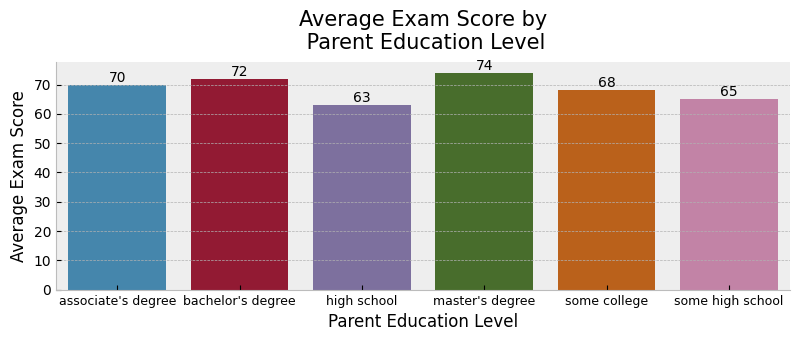

In [13]:
values = np.array(scores_parental_edu["Average Exam Score"]) 
h = sns.catplot(x = "Parent Education Level", y= "Average Exam Score", data = scores_parental_edu, kind = "bar", aspect=2.7, height = 3)
ax = h.facet_axis(0, 0)
plt.xticks(fontsize = 9)
ax.bar_label(ax.containers[0]) 
plt.title("Average Exam Score by\n Parent Education Level",fontsize = 15, y =1.02)
plt.show()

## Impact of Parent Education Level and Test Preparation Course Completion on Average Exam Scores

In [14]:
exam_data["Average Exam Score"] = round((exam_data["Math Exam Score"] + 
                                              exam_data["Reading Exam Score"] + 
                                              exam_data["Writing Exam Score"])/3)

edu_test_table = exam_data.pivot_table(index = "Parent Education Level", columns = "Test Preparation Course", values = "Average Exam Score").round()

Regardless of students' parents' education, those who've completed the test preparation course prior to the exam have a higher average exam score.

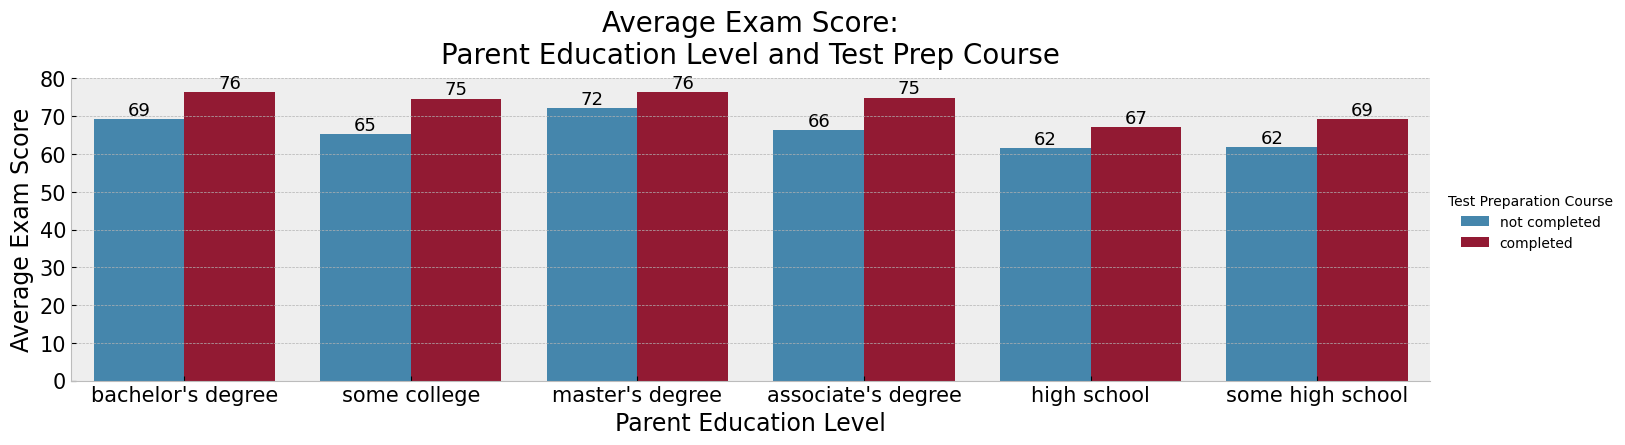

In [15]:
i = sns.catplot(x="Parent Education Level", y="Average Exam Score", data=exam_data,
            hue = "Test Preparation Course",kind="bar", height=3.8, aspect = 3.8, errorbar = None)
ax = i.facet_axis(0, 0)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Parent Education Level", fontsize = 17)
plt.ylabel("Average Exam Score", fontsize = 17)
for container in ax.containers:
    labels = [round(v.get_height()) for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize = 13)
plt.title("Average Exam Score:\nParent Education Level and Test Prep Course",fontsize = 20, y =1.02)
plt.show()

## Inter-subject Correlation Analysis of Exam Scores

It appears, from the heatmap, that the exam scores of different subjects are correlated: reading exam scores have a very strong and positive correlation to writing exam scores (0.95) — as reading exam scores increase so do those for writing. Reading exam scores also have a strong positive correlation to math exam scores (0.82), as do writing exam scores (0.8).

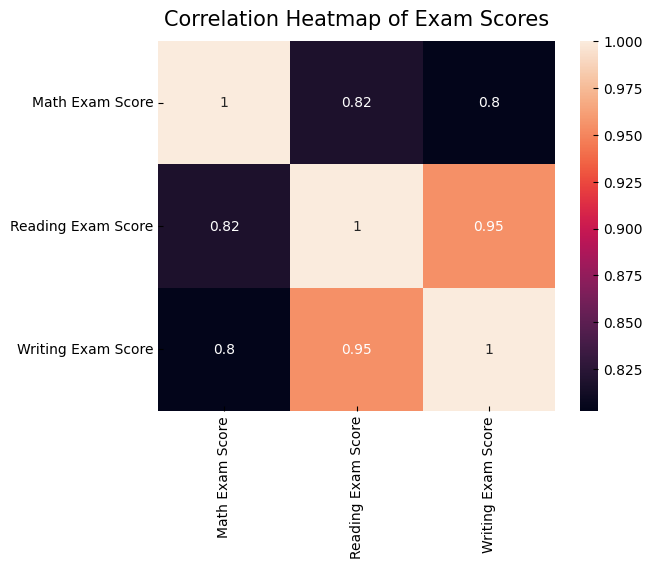

In [16]:
sns.heatmap(exam_data[["Math Exam Score", "Reading Exam Score", "Writing Exam Score"]].corr(), annot = True)
plt.title("Correlation Heatmap of Exam Scores", y = 1.02, fontsize = 15)
plt.show()

We can confirm the existence of a linear relationship between all combinations of math, reading, and writing exam scores using the trendlines in the pairplot, which are very close to the individual data points.

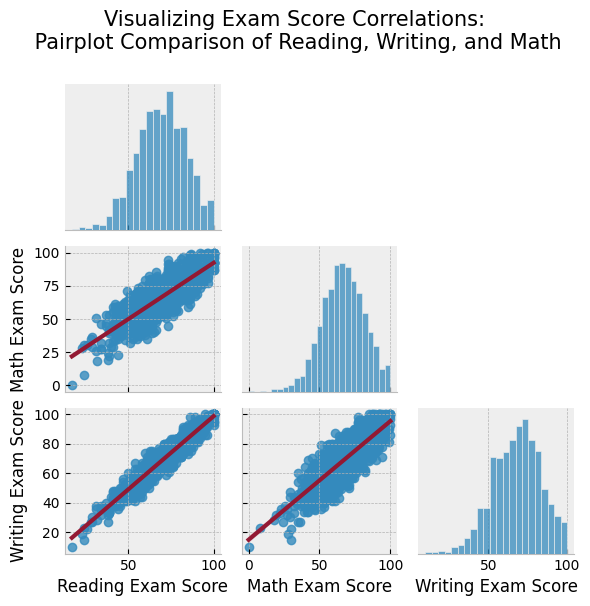

In [17]:
#Pairplot to see whether the correlation is effectively linear or not.
sns.pairplot(data = exam_data[["Reading Exam Score", "Math Exam Score", "Writing Exam Score"]], height =2.0, corner = True, kind = "reg",plot_kws={'line_kws':{'color':'#931933'}})
plt.suptitle("Visualizing Exam Score Correlations:\n Pairplot Comparison of Reading, Writing, and Math", fontsize = 15, y =1.002)
plt.tight_layout()
plt.show()

# 📙 **Conclusions and Recommendations**

Test preparation courses are helpful in boosting final exam scores as, on average, students who've completed them performed better than those who haven't. Parent education level is also positively associated to higher test scores: the more educated the parents are, the better their children perform academically. This is true regardless of whether or not students complete the test preparation course, albeit its influence persists also in this case. Finally, students' exam performance in one subject also translates strongly to performance in the other two.

Based on these results, we can provide three recommendations to the school administration. First, the school administration should promote and expand the availability of test preparation courses. Although students who completed them on average performed better on their final examinations, they comprised less than 40% of the school population.
Second, recognizing the positive association between parent education level and higher test scores, it's important to stimulate parents into being involved in their children's education. This can be achieved through the provision of resources that educate them on how to effectively support their children's learning at home, which is especially important for those parents with lower education levels. For these particular cases, tailormade resources should be developed. Finally, it's important for the school administration to emphasize interdisciplinary learning, given the strong correlation of exam performance between subjects. Designing curriculum and educational approaches that encourage students to draw cross-subject connections helps the development of stronger foundational knowledge and improves overall academic performance.